Pada latihan ini, kita akan menggunakan data “Melbourne Housing Snapshot”. Kalian bisa membaca lebih lanjut penjelasan dataset ini di laman [Kaggle berikut](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('melb_data2.csv',dtype={'Postcode':str})
# df=pd.read_csv('melb_data2.csv')

pd.set_option('display.max_columns', 500)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Ascot Vale,2/43 Roxburgh St,2,u,455000.0,S,Nelson,3/09/2016,5.9,3032,3.0,1.0,2.0,0.0,NaN,NaN,Moonee Valley,-37.7756,144.9165,Western Metropolitan,6567.0
1,Ascot Vale,30 Rothwell St,3,h,940000.0,S,Nelson,3/12/2016,5.9,3032,3.0,1.0,2.0,298.0,108.0,1920.0,Moonee Valley,-37.7777,144.9195,Western Metropolitan,6567.0
2,Ascot Vale,9/5 Rothwell St,2,u,467000.0,SP,Brad,3/12/2016,5.9,3032,2.0,1.0,1.0,0.0,62.0,1980.0,Moonee Valley,-37.7761,144.9201,Western Metropolitan,6567.0
3,Ascot Vale,7 Francis St,3,h,1380000.0,SP,Nelson,4/03/2017,5.9,3032,3.0,2.0,2.0,277.0,174.0,1910.0,Moonee Valley,-37.7777,144.9221,Western Metropolitan,6567.0
4,Ascot Vale,2/21 Harold St,2,u,490000.0,VB,Jellis,4/03/2017,5.9,3032,2.0,1.0,1.0,423.0,62.0,1970.0,Moonee Valley,-37.7736,144.9015,Western Metropolitan,6567.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         1129 non-null   object 
 1   Address        1129 non-null   object 
 2   Rooms          1129 non-null   int64  
 3   Type           1129 non-null   object 
 4   Price          1129 non-null   float64
 5   Method         1129 non-null   object 
 6   SellerG        1129 non-null   object 
 7   Date           1129 non-null   object 
 8   Distance       1129 non-null   float64
 9   Postcode       1129 non-null   object 
 10  Bedroom2       1129 non-null   float64
 11  Bathroom       1129 non-null   float64
 12  Car            1113 non-null   float64
 13  Landsize       1129 non-null   float64
 14  BuildingArea   601 non-null    float64
 15  YearBuilt      713 non-null    float64
 16  CouncilArea    1079 non-null   object 
 17  Lattitude      1129 non-null   float64
 18  Longtitu

Gunakan hanya kolom-kolom berikut

In [4]:
df=df[['Suburb','Address','Rooms','Date','Type','Price','Distance','Landsize','Bedroom2','BuildingArea','Regionname']]
df.head()

,Suburb,Address,Rooms,Date,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname
0,Ascot Vale,2/43 Roxburgh St,2,3/09/2016,u,455000.0,5.9,0.0,3.0,NaN,Western Metropolitan
1,Ascot Vale,30 Rothwell St,3,3/12/2016,h,940000.0,5.9,298.0,3.0,108.0,Western Metropolitan
2,Ascot Vale,9/5 Rothwell St,2,3/12/2016,u,467000.0,5.9,0.0,2.0,62.0,Western Metropolitan
3,Ascot Vale,7 Francis St,3,4/03/2017,h,1380000.0,5.9,277.0,3.0,174.0,Western Metropolitan
4,Ascot Vale,2/21 Harold St,2,4/03/2017,u,490000.0,5.9,423.0,2.0,62.0,Western Metropolitan


In [5]:
df1=df[['Suburb','Type','Date','Distance','Regionname','Price']]
df1.head()

,Suburb,Type,Date,Distance,Regionname,Price
0,Ascot Vale,u,3/09/2016,5.9,Western Metropolitan,455000.0
1,Ascot Vale,h,3/12/2016,5.9,Western Metropolitan,940000.0
2,Ascot Vale,u,3/12/2016,5.9,Western Metropolitan,467000.0
3,Ascot Vale,h,4/03/2017,5.9,Western Metropolitan,1380000.0
4,Ascot Vale,u,4/03/2017,5.9,Western Metropolitan,490000.0


In [6]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Distance,1129.0,3.747033e+00,1.774492,0.0,2.7,3.4,4.3,8.7
Price,1129.0,1.008926e+06,586517.307921,210000.0,570000.0,888000.0,1280000.0,5700000.0


Sekarang, tugas kalian adalah:  
* Eksplorasi dan berikan gambaran umum dari data di atas (missing value, outliers, descriptive statistics)
    * Coba isi missing value berdasarkan hasil eksplorasi kalian
* Buat analisis sederhana untuk mencari tahu hubungan tiap-tiap variabel dengan kolom `Price`. Lakukan uji statistik untuk mengkonfirmasi temuan kalian!
* Berikan simpulan dari analisis kalian. Saran apa yang bisa kalian berikan **kepada calon pembeli rumah** berdasarkan hasil analisis kalian?

1. Suburb
2. Regionname
3. Type
4. Distance from CBD (Central Business District)

* rumah dengan type mana yang paling ideal berdasarkan lokasi (subrub, regional, distance(from CBD)) nya

## Cleansing Data

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Suburb      1129 non-null   object 
 1   Type        1129 non-null   object 
 2   Date        1129 non-null   object 
 3   Distance    1129 non-null   float64
 4   Regionname  1129 non-null   object 
 5   Price       1129 non-null   float64
dtypes: float64(2), object(4)
memory usage: 53.0+ KB


In [8]:
df1[['Suburb','Type','Regionname']]= df1[['Suburb','Type','Regionname']].astype("category")

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [9]:
df1['Date']=pd.to_datetime(df1['Date'])

C:\Users\USER\AppData\Local\Temp/ipykernel_11672/580751001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date']=pd.to_datetime(df1['Date'])


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Suburb      1129 non-null   category      
 1   Type        1129 non-null   category      
 2   Date        1129 non-null   datetime64[ns]
 3   Distance    1129 non-null   float64       
 4   Regionname  1129 non-null   category      
 5   Price       1129 non-null   float64       
dtypes: category(3), datetime64[ns](1), float64(2)
memory usage: 30.8 KB


In [11]:
df1.isna().sum()

Suburb        0
Type          0
Date          0
Distance      0
Regionname    0
Price         0
dtype: int64

In [12]:
df1['Type'].unique()

['u', 'h', 't']
Categories (3, object): ['h', 't', 'u']

In [13]:
xr = []
for i in df1['Type']:
    if i == 'h':
        xr.append('House')
    elif i == 't':
        xr.append('Townhouse')
    elif i == 'u':
        xr.append('Duplex')
df1['Type'] = xr

C:\Users\USER\AppData\Local\Temp/ipykernel_11672/4113983686.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Type'] = xr


In [14]:
df1.head()

,Suburb,Type,Date,Distance,Regionname,Price
0,Ascot Vale,Duplex,2016-03-09,5.9,Western Metropolitan,455000.0
1,Ascot Vale,House,2016-03-12,5.9,Western Metropolitan,940000.0
2,Ascot Vale,Duplex,2016-03-12,5.9,Western Metropolitan,467000.0
3,Ascot Vale,House,2017-04-03,5.9,Western Metropolitan,1380000.0
4,Ascot Vale,Duplex,2017-04-03,5.9,Western Metropolitan,490000.0


In [15]:
df1[df1['Distance']==0]

,Suburb,Type,Date,Distance,Regionname,Price
925,Melbourne,Duplex,2017-06-17,0.0,Northern Metropolitan,740000.0
979,Melbourne,Duplex,2017-05-27,0.0,Northern Metropolitan,720000.0
999,Melbourne,Duplex,2017-08-07,0.0,Northern Metropolitan,1075000.0
1039,Melbourne,Duplex,2017-07-15,0.0,Northern Metropolitan,387000.0
1068,Melbourne,Duplex,2017-07-29,0.0,Northern Metropolitan,565000.0
1069,Melbourne,Duplex,2017-07-29,0.0,Northern Metropolitan,540000.0


Karena distance berpacu terhadap CBD, sehingga values 0 yang berada di distance normal dan dapat menjadi bahan analisis selanjutnya. 

In [16]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Distance,1129.0,3.747033e+00,1.774492,0.0,2.7,3.4,4.3,8.7
Price,1129.0,1.008926e+06,586517.307921,210000.0,570000.0,888000.0,1280000.0,5700000.0


In [17]:
df1

,Suburb,Type,Date,Distance,Regionname,Price
0,Ascot Vale,Duplex,2016-03-09,5.9,Western Metropolitan,455000.0
1,Ascot Vale,House,2016-03-12,5.9,Western Metropolitan,940000.0
2,Ascot Vale,Duplex,2016-03-12,5.9,Western Metropolitan,467000.0
3,Ascot Vale,House,2017-04-03,5.9,Western Metropolitan,1380000.0
4,Ascot Vale,Duplex,2017-04-03,5.9,Western Metropolitan,490000.0
...,...,...,...,...,...,...
1124,Carlton,House,2017-08-26,1.6,Northern Metropolitan,1760000.0
1125,Maribyrnong,House,2017-08-26,4.3,Western Metropolitan,3400000.0
1126,North Melbourne,House,2017-08-26,1.8,Northern Metropolitan,1080000.0
1127,Port Melbourne,Townhouse,2017-08-26,3.5,Southern Metropolitan,2455000.0


## Explorasi data
* uji statistik dan analisis sederhana

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Jumlah hunian berdasarkan suburb')

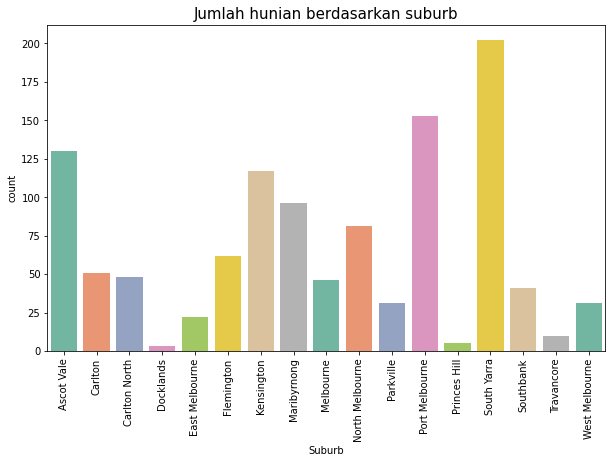

In [18]:
plt.figure(figsize=(10,6))
g=sns.countplot(df1['Suburb'],data=df1,palette='Set2')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Jumlah hunian berdasarkan suburb',fontsize=15)

berdasarkan data di atas Suburb yang terdapat rumah yang paling banyak yaitu bisa kita ranking kan:
1. South Yarra (Southern metropolitan)
2. Port Melbourne (Southern metropolitan)
3. Ascot Vale (Western metropolitan)

sehingga apabila ingin lokasi yang ramai dalam artian banyak rumah-rumah, maka dapat memperimbangkan di 3 Suburb tersebut

Text(0.5, 1.0, 'Jumlah type rumah berdasarkan region nya')

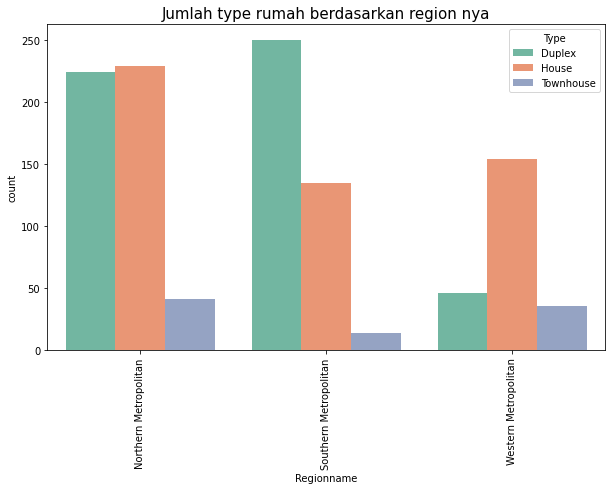

In [19]:
plt.figure(figsize=(10,6))
g=sns.countplot(df1['Regionname'],hue='Type',data=df1,palette='Set2')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Jumlah type rumah berdasarkan region nya',fontsize=15)

In [20]:
area=pd.crosstab(df1['Regionname'],df1['Type'],normalize='index')
area

Type,Duplex,House,Townhouse
Regionname,,,
Northern Metropolitan,0.453441,0.463563,0.082996
Southern Metropolitan,0.626566,0.338346,0.035088
Western Metropolitan,0.194915,0.652542,0.152542


Berdasarkan data di atas jika anda ingin memiliki rumah dengan type duplex disarankan memilih lokasi pada region southern metropolitan dan northern metropolitan yag memiliki jumlah type rumah duplex yang banyak, dan untuk tipe yang lain rata-rata di setiap region hampir sama jumlah nya tetapi untuk type hause yang cukup banyak ada di nothern metropolitan dan untuk townhouse tidak di saran kan di daerah region southern metropolitan karena hanya sedikit jumlah townhouse yang berada di sana.

## Uji statistik Suburb dan type

**Hypothesis**

H0: suburb tidak memiliki keterkaitan dengan type

H1: suburb memiliki keterkaitan dengan type

In [21]:
df1['Suburb'].value_counts()

South Yarra        202
Port Melbourne     153
Ascot Vale         130
Kensington         117
Maribyrnong         96
North Melbourne     81
Flemington          62
Carlton             51
Carlton North       48
Melbourne           46
Southbank           41
Parkville           31
West Melbourne      31
East Melbourne      22
Travancore          10
Princes Hill         5
Docklands            3
Name: Suburb, dtype: int64

In [22]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df1['Suburb'],df1['Type']))

(337.8764768738364,
 9.34513405820789e-53,
 32,
 array([[59.87599646, 59.64570416, 10.47829938],
        [23.48981399, 23.39946856,  4.11071745],
        [22.10806023, 22.02302923,  3.86891054],
        [ 1.38175376,  1.37643933,  0.24180691],
        [10.13286094, 10.0938884 ,  1.77325066],
        [28.55624446, 28.44641275,  4.99734278],
        [53.88839681, 53.68113375,  9.43046944],
        [44.21612046, 44.04605846,  7.73782108],
        [21.18689105, 21.10540301,  3.70770593],
        [37.30735164, 37.16386182,  6.52878654],
        [14.27812223, 14.22320638,  2.49867139],
        [70.46944198, 70.19840567, 12.33215235],
        [ 2.30292294,  2.29406554,  0.40301151],
        [93.0380868 , 92.68024801, 16.28166519],
        [18.88396811, 18.81133747,  3.30469442],
        [ 4.60584588,  4.58813109,  0.80602303],
        [14.27812223, 14.22320638,  2.49867139]]))

In [23]:
stats, pval, dof, expected=chi2_contingency(pd.crosstab(df1['Suburb'],df1['Type']))
print(pval)

if pval<=0.05:
    print('tolak h0')
else:
    print('terima h0')

9.34513405820789e-53
tolak h0


## Mengkaitkan data dengan harga

* untuk mendapatkan insight baru mengenai variable yang dapat mempengaruhi harga

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

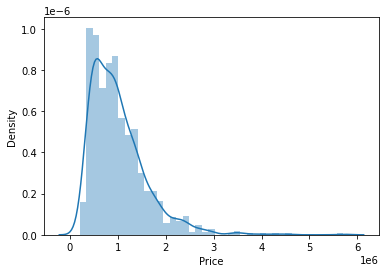

In [24]:
sns.distplot(df1['Price'])

Distribusi dari data price **tidak normal**

In [25]:
from scipy.stats import shapiro
stats, pval=shapiro(df1['Price'])
print(pval)

if pval>0.05:
    print('distribusi data diasumsikan normal')
else:
    print('distribusi data diasumsikan tidak normal')

8.001825144917476e-31
distribusi data diasumsikan tidak normal


In [26]:
from scipy.stats import shapiro
kolom=['Price','Distance']
distribusi=[]
for i in kolom:
    stats, pval=shapiro(df1[i])
    print(pval)
    if pval>0.05:
        distribusi.append('normal')
    else:
        distribusi.append(' tidak normal')
        
pd.DataFrame(distribusi, index=kolom)

8.001825144917476e-31
6.826237205936953e-29


,0
Price,tidak normal
Distance,tidak normal


In [27]:
df1[['Distance','Price']].corr(method='spearman')

,Distance,Price
Distance,1.000000,0.041223
Price,0.041223,1.000000


<AxesSubplot:>

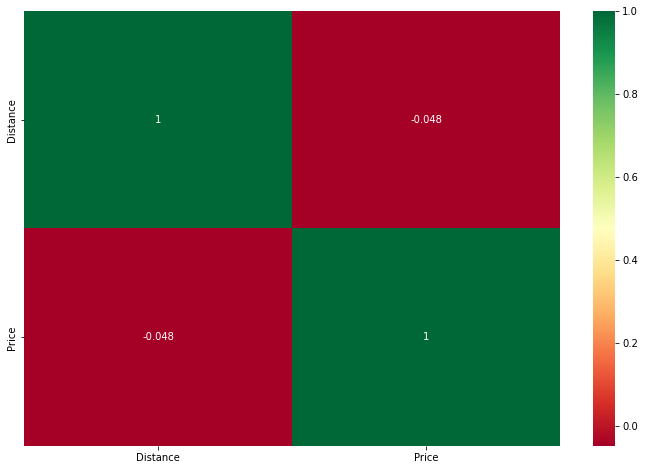

In [28]:
plt.subplots(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True , cmap = "RdYlGn")

## result

karena kolerasi lemah dan berbanding terbalik, maka harga tidak dipengaruhi oleh jarak

In [29]:
df1.groupby(['Regionname','Suburb','Type'], as_index=False).median().sort_values(by='Price',ascending=False).head(17)

,Regionname,Suburb,Type,Distance,Price
13,Northern Metropolitan,East Melbourne,House,1.5,3520000.0
31,Northern Metropolitan,Parkville,House,2.6,1851000.0
37,Northern Metropolitan,Princes Hill,House,3.5,1700000.0
91,Southern Metropolitan,South Yarra,House,3.3,1700000.0
25,Northern Metropolitan,Melbourne,House,2.8,1630000.0
49,Northern Metropolitan,West Melbourne,House,1.9,1605000.0
92,Southern Metropolitan,South Yarra,Townhouse,3.3,1587500.0
148,Western Metropolitan,Travancore,House,5.3,1562000.0
7,Northern Metropolitan,Carlton North,House,3.2,1540000.0
86,Southern Metropolitan,Port Melbourne,Townhouse,3.8,1388000.0


## berdasarkan data di atas

* jika melihat dari urutan harga rumah yang termahal, jarak tidak terlalu mempengaruhi harga sedangkan lokasi dari region northern metropolitan mendominasi harga termahal tetapi harga termurah pun berada di region tersebut, sehingga tidak dapat di tarik kesimpulan karena masih ada pengaruh lain yang dapat mempengaruhi harga, bisa jadi type yang mempunyai pengaruh tinggi terhadap harga rumah

In [30]:
price_bysuburb=df1.groupby('Suburb').median()['Price'].sort_values(ascending=False)
price_bysuburb

Suburb
Princes Hill       1700000.0
Carlton North      1463000.0
Port Melbourne     1150000.0
Parkville          1040000.0
Ascot Vale         1007500.0
West Melbourne      995000.0
Travancore          978000.0
Carlton             957000.0
Flemington          917500.0
East Melbourne      897500.0
Maribyrnong         820000.0
Kensington          812000.0
South Yarra         802000.0
Docklands           800000.0
North Melbourne     780000.0
Southbank           600000.0
Melbourne           542500.0
Name: Price, dtype: float64

#### berdasarkan Suburb nya, harga tertinggi berada di daerah subrub **Prices Hill**

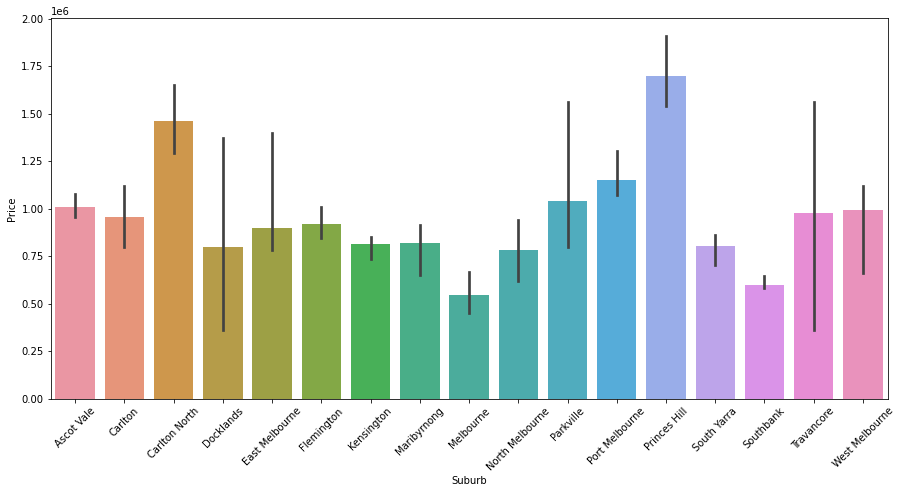

In [31]:
plt.figure(figsize=(15,7))
sns.barplot(data=df1, x='Suburb', y='Price', estimator=np.median)
plt.xticks(rotation=45)
plt.show()

In [32]:
df1.groupby('Regionname').median()['Price'].sort_values(ascending=False)

Regionname
Western Metropolitan     945000.0
Northern Metropolitan    857500.0
Southern Metropolitan    857000.0
Name: Price, dtype: float64

#### Berdasarkan region nya, harga yang paling tinggi ada di region western metropolitan, dan di region yang lain harga perbandingan nya hanya sedikit

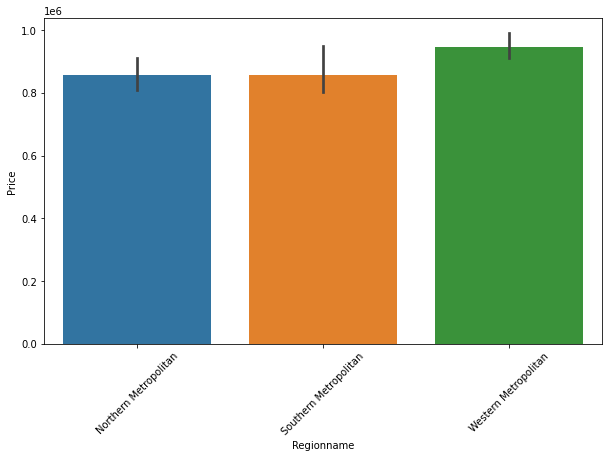

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(data=df1, x='Regionname', y='Price', estimator=np.median)
plt.xticks(rotation=45)
plt.show()

In [34]:
df1.groupby('Type').median()['Price'].sort_values(ascending=False)

Type
House        1230000.0
Townhouse     855000.0
Duplex        573500.0
Name: Price, dtype: float64

#### Berdasarkan type nya, harga yang paling tinggi ada di type house, dan di type yang lain harga perbandingan nya sangat jauh dan dapat di asumsikan type sangat mempengaruhi harga

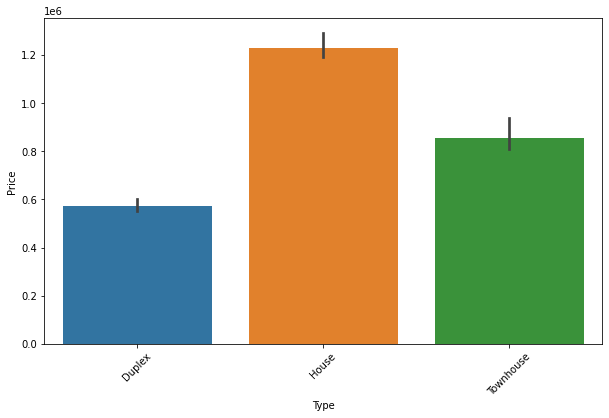

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(data=df1, x='Type', y='Price', estimator=np.median)
plt.xticks(rotation=45)
plt.show()

## **Hypothesis untuk price dan type**

H0: tidak ada perbedaan nilai median harga rumah di type duplex, house, dan townhouse

H1: setidaknya ada 1 pasang di antara type duplex, house, dan townhouse yang memiliki nilai median yang berbeda.

In [36]:
from scipy.stats import kruskal
stats, pval=kruskal(*[df1[df1['Type']==i]['Price'] for i in ['Duplex','House','Townhouse']])
print(pval)

if pval<=0.05:
    print('tolak h0')
else:
    print('terima h0')

1.0967384044342614e-122
tolak h0


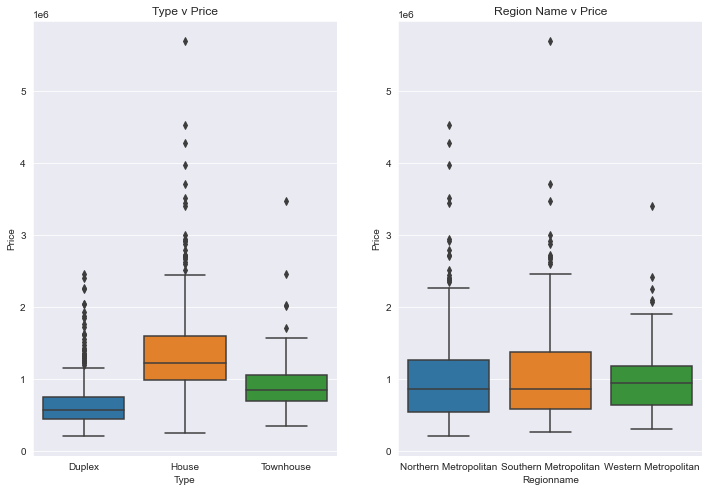

In [37]:
sns.set_style('darkgrid')
f, axes = plt.subplots(1,2, figsize = (12,8))

# Plot [0]
sns.boxplot(data = df1, x = 'Type', y = 'Price', ax = axes[0])
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Price')
axes[0].set_title('Type v Price')

# Plot [1]
sns.boxplot(x = 'Regionname', y = 'Price', data = df1, ax = axes[1])
axes[1].set_xlabel('Regionname')
axes[1].set_ylabel('Price')
axes[1].set_title('Region Name v Price')

plt.show()

In [38]:
df1.groupby('Regionname').median()['Distance']

Regionname
Northern Metropolitan    2.8
Southern Metropolitan    3.3
Western Metropolitan     5.9
Name: Distance, dtype: float64

<AxesSubplot:xlabel='Regionname', ylabel='Distance'>

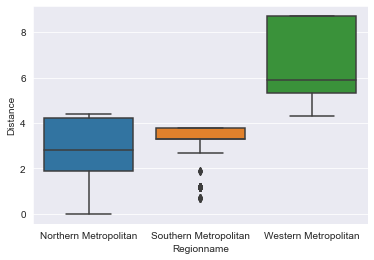

In [39]:
sns.boxplot(data=df1, y='Distance', x='Regionname')

In [40]:
df1['Distance'].describe()

count    1129.000000
mean        3.747033
std         1.774492
min         0.000000
25%         2.700000
50%         3.400000
75%         4.300000
max         8.700000
Name: Distance, dtype: float64

In [41]:
df1.groupby('Suburb').median()['Distance']

Suburb
Ascot Vale         5.9
Carlton            1.8
Carlton North      3.2
Docklands          1.9
East Melbourne     1.5
Flemington         4.4
Kensington         4.2
Maribyrnong        8.7
Melbourne          2.8
North Melbourne    2.3
Parkville          2.6
Port Melbourne     3.8
Princes Hill       3.5
South Yarra        3.3
Southbank          1.2
Travancore         5.3
West Melbourne     1.9
Name: Distance, dtype: float64

In [42]:
df1['Distance'].apply(lambda x:'Class1' if x<=2.8 else 'Class2' if x<=3.5 else 'Class3')

0       Class3
1       Class3
2       Class3
3       Class3
4       Class3
         ...  
1124    Class1
1125    Class3
1126    Class1
1127    Class2
1128    Class2
Name: Distance, Length: 1129, dtype: object

In [43]:
df1['Category_Distance']=df1['Distance'].apply(lambda x:'Class1' if x<=2.8 else 'Class2' if x<=3.5 else 'Class3')

C:\Users\USER\AppData\Local\Temp/ipykernel_11672/2060915726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Category_Distance']=df1['Distance'].apply(lambda x:'Class1' if x<=2.8 else 'Class2' if x<=3.5 else 'Class3')


In [44]:
df1

,Suburb,Type,Date,Distance,Regionname,Price,Category_Distance
0,Ascot Vale,Duplex,2016-03-09,5.9,Western Metropolitan,455000.0,Class3
1,Ascot Vale,House,2016-03-12,5.9,Western Metropolitan,940000.0,Class3
2,Ascot Vale,Duplex,2016-03-12,5.9,Western Metropolitan,467000.0,Class3
3,Ascot Vale,House,2017-04-03,5.9,Western Metropolitan,1380000.0,Class3
4,Ascot Vale,Duplex,2017-04-03,5.9,Western Metropolitan,490000.0,Class3
...,...,...,...,...,...,...,...
1124,Carlton,House,2017-08-26,1.6,Northern Metropolitan,1760000.0,Class1
1125,Maribyrnong,House,2017-08-26,4.3,Western Metropolitan,3400000.0,Class3
1126,North Melbourne,House,2017-08-26,1.8,Northern Metropolitan,1080000.0,Class1
1127,Port Melbourne,Townhouse,2017-08-26,3.5,Southern Metropolitan,2455000.0,Class2


C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Jumlah type rumah berdasarkan Category Distance nya')

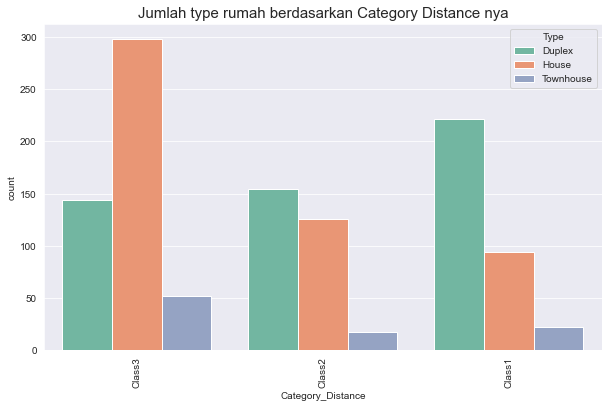

In [45]:
plt.figure(figsize=(10,6))
g=sns.countplot(df1['Category_Distance'],hue='Type',data=df1,palette='Set2')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Jumlah type rumah berdasarkan Category Distance nya',fontsize=15)

kategori jarak dibagi menjadi tiga kelas
* class1: jarak menuju CBD di bawah 2.8
* class2: jarak menuju CBD di bawah 3.5
* class3: jarak menuju CBD di atas  3.5

berdasarkan data di atas type rumah yang lokasi nya di kategori class1 yang diasumsikan memiliki jarak tempuh paling sedikit dengan CBD yaitu Duplex. jika anda mencari type rumah house mungkin type tersebut keanyakan berada di class3 yang di asumsikan memiliki jarak tempuh paling banyak terhadap CBD.

In [46]:
df1.groupby('Category_Distance').median()['Price']

Category_Distance
Class1    750000.0
Class2    920000.0
Class3    940000.0
Name: Price, dtype: float64

In [47]:
import folium

In [48]:
worldmap=folium.Map()
worldmap

In [49]:
Melbourne_map=folium.Map(location=[-37.8136, 144.9631], zoom_start=10)
Melbourne_map

In [50]:
df1.groupby('Suburb').median()['Distance']

Suburb
Ascot Vale         5.9
Carlton            1.8
Carlton North      3.2
Docklands          1.9
East Melbourne     1.5
Flemington         4.4
Kensington         4.2
Maribyrnong        8.7
Melbourne          2.8
North Melbourne    2.3
Parkville          2.6
Port Melbourne     3.8
Princes Hill       3.5
South Yarra        3.3
Southbank          1.2
Travancore         5.3
West Melbourne     1.9
Name: Distance, dtype: float64

In [51]:
Melbourne_map=folium.Map(location=[-37.8136, 144.9631], zoom_start=10)


folium.Marker([-37.8124, 144.9623],
               popup='<i>CBD<i>',
               tooltip='here is CBD', # kalau di over over keluar tulisan ini
               icon= folium.Icon(color='purple', icon='info-sign')
               ).add_to(Melbourne_map)

folium.Marker([-37.7767, 144.9671],
               popup='Ascot Vale',
               tooltip='here is Ascot Vale', # kalau di over over keluar tulisan ini
               ).add_to(Melbourne_map)


folium.Marker([-37.8001, 144.9671],
               popup='Carlton',
               tooltip='mari ke Carlton', # kalau di over over keluar tulisan ini
               ).add_to(Melbourne_map)


folium.Marker([-37.7888, 144.9720],
               popup='Carlton North',
               tooltip='mari ke Carlton North', # kalau di over over keluar tulisan ini
               ).add_to(Melbourne_map)

folium.Marker([-37.8190, 144.9466],
               popup='Docklands',
               tooltip='mari ke Docklands', # kalau di over over keluar tulisan ini
               ).add_to(Melbourne_map)

folium.Marker([-37.8130, 144.9850],
               popup='East Melbourne',
               tooltip='mari ke East Melbourne', # kalau di over over keluar tulisan ini
               ).add_to(Melbourne_map)

folium.Marker([-37.7833, 144.9277],
               popup='Flemington',
               tooltip='mari ke Flemington', # kalau di over over keluar tulisan ini
               ).add_to(Melbourne_map)

folium.Marker([-37.7696, 144.8821],
               popup='Maribyrnong',
               tooltip='mari ke Maribyrnong', 
               ).add_to(Melbourne_map)

folium.Marker([-37.7941, 144.9277],
               popup='Kensington',
               tooltip='mari ke Kensington', 
               ).add_to(Melbourne_map)

folium.Marker([-37.8136, 144.9631],
               popup='Melbourne',
               tooltip='mari ke Melbourne', 
               ).add_to(Melbourne_map)

folium.Marker([-37.7992, 144.9467],
               popup='North Melbourne',
               tooltip='mari ke North Melbourne', 
               ).add_to(Melbourne_map)

folium.Marker([-37.7787, 144.9426],
               popup='Parkville',
               tooltip='mari ke Parkville', 
               ).add_to(Melbourne_map)

folium.Marker([-37.8332, 144.9125],
               popup='Port Melbourne',
               tooltip='Sini ke Port Melbourne', 
               ).add_to(Melbourne_map)

folium.Marker([-37.7840, 144.9660],
               popup='Princes Hill',
               tooltip='Sini ke Princes Hill', 
               ).add_to(Melbourne_map)

folium.Marker([-37.8400, 144.9890],
               popup='South Yarra',
               tooltip='Sini ke South Yarra', 
               ).add_to(Melbourne_map)

folium.Marker([-37.8290, 144.9570],
               popup='Southbank',
               tooltip='mari ke Southbank', 
               ).add_to(Melbourne_map)

folium.Marker([-37.7780, 144.9350],
               popup='Travancore',
               tooltip='mari ke Travancore', 
               ).add_to(Melbourne_map)

folium.Marker([-28.0717, 80.6534],
               popup='West Melbourne',
               tooltip='ayo ke West Melbourne', 
               ).add_to(Melbourne_map)


Melbourne_map

# kesimpulan

dari data di atas sesuai dengan data lokasi bahwa jika kita menawarkan property kepada konsumen berdasarkan lokasi, sebenernya sesuai dengan kebutuhan dan kondisi dari konsumen tersebut nanti kita akan menyesuaikan dengan kebutuhan konsumen tersebut.

* jika ingin di pusat perkotaan kami menawarkan harga relatif terjangka tetapi type dari property nya duplex.
* jika ingin jauh dari pusat perkotaan kami menawarkan harga relatif tinggi dan type dari property nya House.